In [1]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures  
from sklearn.pipeline import Pipeline

In [2]:
df = pd.read_csv('Data/points.csv', sep=';')
df

,x,y
0,570.611755,-323889.939931
1,77.326526,-5751.412105
2,662.585274,-437035.490018
3,610.024062,-370303.284308
4,310.003105,-95175.915727
5,971.091035,-940108.525147
6,295.000507,-86144.297707
7,855.649494,-729573.107877
8,619.191183,-381544.147530
9,692.114184,-476949.701180


<Axes: xlabel='x', ylabel='y'>

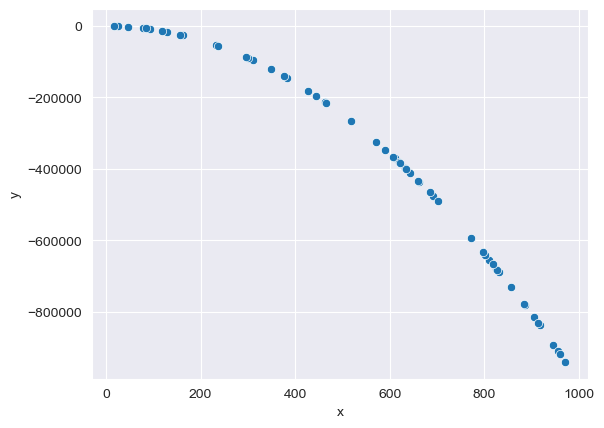

In [3]:
sns.scatterplot(data=df, x='x', y='y')

In [4]:
class PolynomialRegression:
    def __init__(self, degree):
        self.degree = degree
        self.model = Pipeline([('poly', PolynomialFeatures(degree=degree)),
                               ('linear', LinearRegression())])
    
    def fit(self, X, y):
        self.model.fit(X, y)
    
    def predict(self, X):
        return self.model.predict(X)
    
    def score(self, X, y):
        return self.model.score(X, y)
    
    def get_params(self, deep=True):
        return self.model.get_params(deep)

In [5]:
model = PolynomialRegression(degree=2)

X = df[['x']]
y = df['y']

model.fit(X, y)

# Declare a range of x values from 0 to 1000 with step 0.01 and predict y values
X_pred = pd.DataFrame({'x': [x/100 for x in range(100000)]})
Y_pred = model.predict(X_pred)

<Axes: xlabel='x', ylabel='y'>

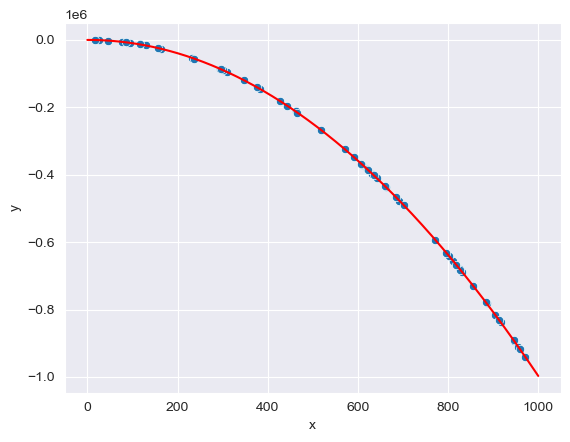

In [6]:
# Plot x and y and create a trend based on the model
plot = sns.scatterplot(data=df, x='x', y='y')
plot = sns.lineplot(data=X_pred, x='x', y=Y_pred, color='red')
plot